<a href="https://colab.research.google.com/github/ArfaKhalid/Multinomial-Logistic-Regression-Model--Covid19-Vaccines-Analysis/blob/main/Analyzing_the_effectiveness_of_Covid_19_Vaccines_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone project
## Analyzing the effectiveness of Covid19 Vaccines among different age groups multinomial logistic regresion model

# Background of MLR Model
Multinomial Logistic Regression is a statistical method that extends binary logistic regression to handle cases where there are more than two possible discrete outcomes. Multinomial logistic regression is a type of classification algorithm.

### Logistic Regression:

Logistic Regression is a binary classification algorithm used when the dependent variable is categorical and has two classes. It models the probability that an instance belongs to a particular class.

In binary logistic regression, the model's output is transformed using the logistic function (sigmoid function), which ensures that the predicted values fall between 0 and 1. The decision boundary is set at 0.5, and instances are classified based on whether the predicted probability is above or below this threshold.

### Multinomial Logistic Regression:

Multinomial Logistic Regression extends binary logistic regression to handle multiple classes. Instead of predicting a binary outcome, it predicts the probability of an instance belonging to each class. The softmax function is used to transform the raw model output into a probability distribution over multiple classes.

Here are the key components of multinomial logistic regression:

1. **Model Output:**
   - For each class, the model produces a separate set of coefficients.
   - The softmax function converts the raw scores (logits) into probabilities, ensuring that the probabilities sum to 1 across all classes.

2. **Decision Rule:**
   - The class with the highest probability is chosen as the predicted class for a given instance.

3. **Parameters:**
   - The model is trained to learn a set of parameters (coefficients) that maximize the likelihood of the observed data.

4. **Loss Function:**
   - The cross-entropy loss function is commonly used for training multinomial logistic regression models. It measures the difference between the predicted probabilities and the actual class labels.

5. **Regularization:**
   - Regularization techniques (e.g., L1 or L2 regularization) can be applied to prevent overfitting.

### Practical Examples:

Multinomial Logistic Regression is suitable for scenarios where there are more than two classes, and the classes are mutually exclusive. Examples include:
- Predicting the type of fruit (e.g., apple, orange, banana) based on certain features.
- Predicting the outcome of a medical diagnosis (e.g., healthy, mild, severe).

### Implementation:

In Python, libraries such as scikit-learn provide implementations of multinomial logistic regression. The `LogisticRegression` class in scikit-learn can be used with the `multi_class` parameter set to 'multinomial'.

```python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
```

Overall, multinomial logistic regression is a fundamental algorithm for multiclass classification problems and serves as a building block for more complex models in machine learning.

# Target
## Analyzing Covid19 Cases for Vaccines effectiveness among different Age groups

Libraries Used in the context of analyzing COVID-19 vaccine data among different age groups:
- **Pandas and NumPy:** Data handling and numerical operations.
- **Scikit-learn:** Building and evaluating machine learning models.
- **Seaborn and Matplotlib:** Creating visually appealing plots to communicate insights.


In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Review the Data - Variables in the Datasets


 **Date:**
This variable represents the specific date of observations from 2021-09-05 to 2021-12-31. It indicates when the data was recorded.

**Age groups:**
This variable categorizes individuals into different age groups, labeled from 1 to 8. Each number corresponds to a specific age group.

| Age Group | Category |
|-----------|----------|
| 1         | 0-19     |
| 2         | 19-29    |
| 3         | 29-39    |
| 4         | 39-49    |
| 5         | 49-59    |
| 6         | 59-69    |
| 7         | 69-79    |
| 8         | 79-80+   |

 **Unvaccinated Cases:**This variable indicates the number of COVID-19 cases among individuals in each age group who have not received any doses of the vaccine.

**Partially Vaccinated Cases:**This variable represents the number of COVID-19 cases among individuals in each age group who have received at least one dose of the COVID-19 vaccine but are not fully vaccinated.

**Fully Vaccinated Cases:**This variable shows the number of COVID-19 cases among individuals in each age group who have received all recommended doses of the COVID-19 vaccine, making them fully vaccinated.

In summary, the dataset captures information about COVID-19 cases based on age groups and vaccination status on a specific date. The variables include the date of observation, age group categorization, and the number of cases for unvaccinated, partially vaccinated, and fully vaccinated individuals within each age group.

In [ ]:
# Load dataset from Excel file
data_file = pd.read_excel('Covid19_Cases_dataset.xlsx')
df = pd.DataFrame(data_file)
df.head()

,Date,Age groups,Unvaccinated Cases,Partially Vaccinated Cases,Fully Vaccinated Cases
0,2021-09-05,1,98,7,0
1,2021-09-05,2,63,12,9
2,2021-09-05,3,50,4,11
3,2021-09-05,4,28,3,9
4,2021-09-05,5,29,0,9


In [ ]:
df.tail()

,Date,Age groups,Unvaccinated Cases,Partially Vaccinated Cases,Fully Vaccinated Cases
931,2021-12-31,4,70,0,42
932,2021-12-31,5,51,0,24
933,2021-12-31,6,35,0,9
934,2021-12-31,7,6,0,7
935,2021-12-31,8,7,0,5


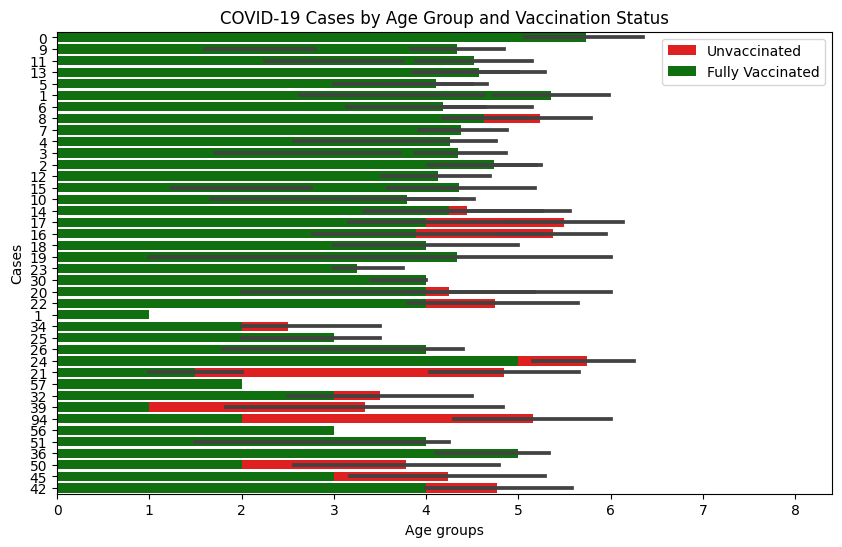

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.barplot(x='Age groups', y='Unvaccinated Cases', data=df, label='Unvaccinated', color='red')
sns.barplot(x='Age groups', y='Fully Vaccinated Cases', data=df, label='Fully Vaccinated', color='green')

plt.xlabel('Age groups')
plt.ylabel('Cases')
plt.title('COVID-19 Cases by Age Group and Vaccination Status')
plt.legend()
plt.show()


# Drop age group column for visulaization

In [ ]:
df = df.drop('Age groups',axis=1)

In [ ]:
df.head()

,Date,Unvaccinated Cases,Partially Vaccinated Cases,Fully Vaccinated Cases
0,2021-09-05,98,7,0
1,2021-09-05,63,12,9
2,2021-09-05,50,4,11
3,2021-09-05,28,3,9
4,2021-09-05,29,0,9


#Visualize Total Data

In [ ]:
df = df.iloc[5:]

# Time series Plot

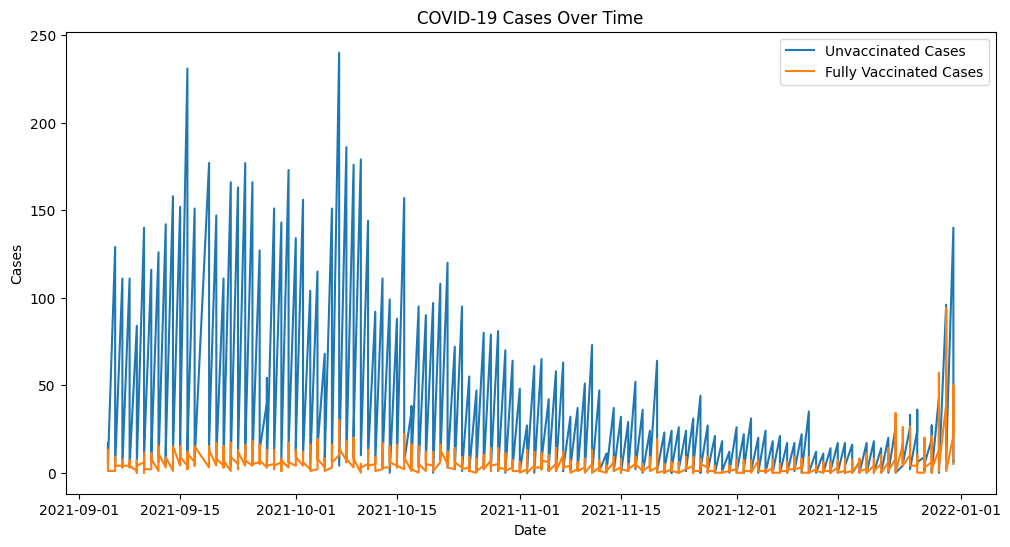

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(df['Date'], df['Unvaccinated Cases'], label='Unvaccinated Cases')
plt.plot(df['Date'], df['Fully Vaccinated Cases'], label='Fully Vaccinated Cases')

plt.xlabel('Date')
plt.ylabel('Cases')
plt.title('COVID-19 Cases Over Time')
plt.legend()
plt.show()


# Reshaping Data for Aanlysis
## Long Format:
The melt function transforms the wide format into long format, where a single column represents the different categories (e.g., 'VACCINATION STATUS') and another column represents the corresponding values (e.g., 'CASES'). This makes it easier to analyze and visualize relationships.It also facilitate statistical Modeling.

In [ ]:
# Melt the data to long format
df_long = pd.melt(
    df,
    id_vars=['Date', 'Age groups'],
    var_name='VACCINATION STATUS',
    value_name='CASES'
)

# Combine 'Partially Vaccinated Cases', 'Fully Vaccinated Cases', and 'Unvaccinated Cases' into 'VACCINATION STATUS'
df_long['VACCINATION STATUS'] = df_long['VACCINATION STATUS'].str.replace(' Cases', '')

# Convert 'CASES' column to numeric type
df_long['CASES'] = pd.to_numeric(df_long['CASES'], errors='coerce')

#view data
df_long


,Date,Age groups,VACCINATION STATUS,CASES
0,2021-09-05,1,Unvaccinated,98.0
1,2021-09-05,2,Unvaccinated,63.0
2,2021-09-05,3,Unvaccinated,50.0
3,2021-09-05,4,Unvaccinated,28.0
4,2021-09-05,5,Unvaccinated,29.0
...,...,...,...,...
2803,2021-12-31,4,Fully Vaccinated,42.0
2804,2021-12-31,5,Fully Vaccinated,24.0
2805,2021-12-31,6,Fully Vaccinated,9.0
2806,2021-12-31,7,Fully Vaccinated,7.0


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_long['VACCINATION STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_long, x='CASES', y='VACCINATION STATUS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_long['VACCINATION STATUS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_long, x='Age groups', y='VACCINATION STATUS', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
df_long['CASES'].plot(kind='line', figsize=(8, 4), title='CASES')
plt.gca().spines[['top', 'right']].set_visible(False)

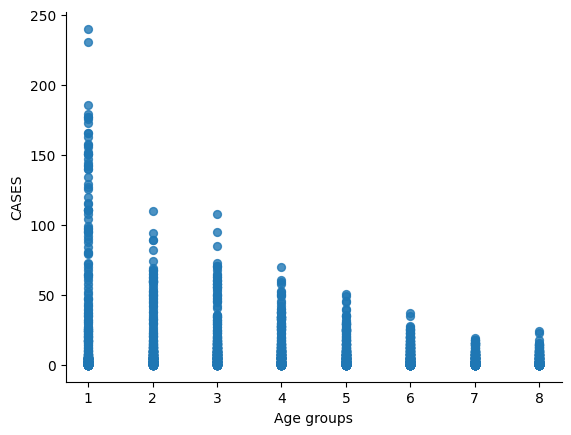

In [ ]:
from matplotlib import pyplot as plt
df_long.plot(kind='scatter', x='Age groups', y='CASES', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

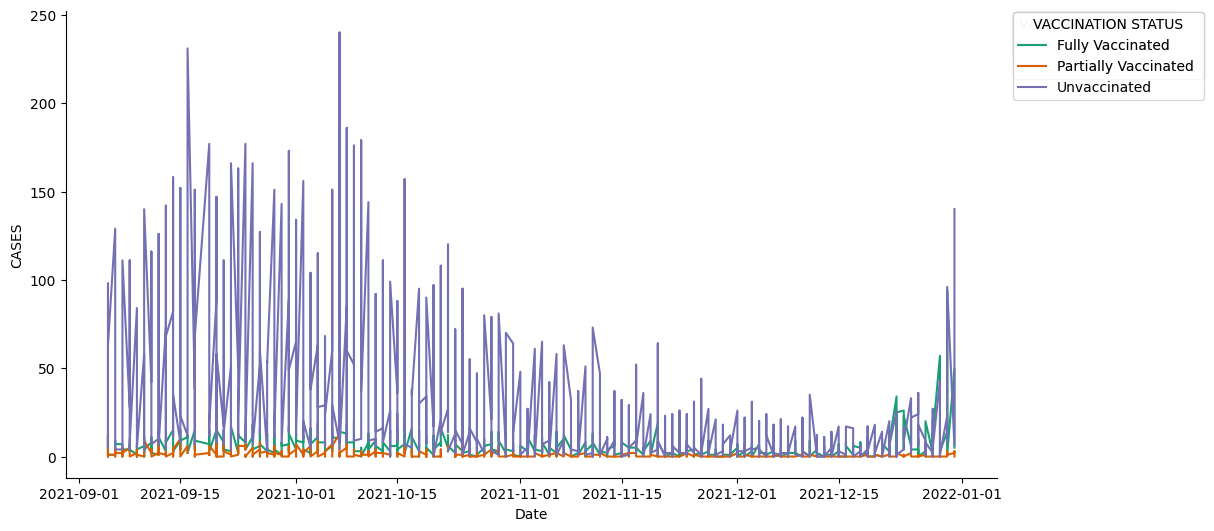

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['CASES']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_long.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('VACCINATION STATUS')):
  _plot_series(series, series_name, i)
  fig.legend(title='VACCINATION STATUS', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('CASES')

# Reference Category
- **Reference Category in Multinomial Logistic Regression:**
  - Designating a reference category, such as 'Fully Vaccinated,' is crucial in multinomial logistic regression modeling.

- **Impact on Coefficient Interpretation:**
  - The choice of reference category directly influences how the model interprets coefficients.

- **Log-Odds and Logit Representation:**
  - Model output represents the log-odds or logit of being 'Partially Vaccinated' or 'Unvaccinated' relative to 'Fully Vaccinated.'

- **Contrast Between Categories:**
  - By setting 'Fully Vaccinated' as the reference, coefficients express the contrast between alternative categories and the fully vaccinated group.

- **Standard Practice in Data Preparation:**
  - Reordering categories is a common step in preparing data for multinomial logistic regression.

- **Ensuring Meaningful and Interpretable Results:**
  - The goal is to obtain results that are both coherent and interpretable within the context of the chosen reference category.

In [ ]:
# Print the column names to inspect them
print(df_long.columns)

Index(['Date', 'Age groups', 'VACCINATION STATUS', 'CASES'], dtype='object')


In [ ]:
# Convert categorical variables to category type
df_long['VACCINATION STATUS'] = pd.Categorical(df_long['VACCINATION STATUS'])
df_long['Age groups'] = pd.Categorical(df_long['Age groups'])

In [ ]:
# Convert 'CASES' column to numerical type
df_long['CASES'] = pd.to_numeric(df_long['CASES'])

In [ ]:
# Check the unique values in the 'VACCINATION STATUS' column
print(df_long['VACCINATION STATUS'].unique())

['Unvaccinated', 'Partially Vaccinated ', 'Fully Vaccinated']
Categories (3, object): ['Fully Vaccinated', 'Partially Vaccinated ', 'Unvaccinated']


In [ ]:
# Set "Fully Vaccinated" as the reference category
df_long['VACCINATION STATUS'] = df_long['VACCINATION STATUS'].cat.reorder_categories(
    ['Fully Vaccinated', 'Partially Vaccinated ', 'Unvaccinated'],
    ordered=True
)


# Model Development

1. **Data Splitting:**
   - The data is splitting into two parts: one for training a model and another for testing the model.

2. **Features and Target:**
   - `df_long[['Age groups', 'CASES']]`: This part selects the features (input variables) for the model. In this case, it includes 'Age groups' and 'CASES' (likely representing the number of cases).
   - `df_long['VACCINATION STATUS']`: This selects the target variable (the variable we want to predict), which is 'VACCINATION STATUS.'

3. **Train-Test Split:**
   - The `train_test_split` function divides the dataset into training and testing sets.
   - `X_train, X_test`: These variables represent the feature sets for training and testing, respectively.
   - `y_train, y_test`: These variables represent the target sets for training and testing, respectively.

4. **Parameters:**
   - `test_size=0.2`: It indicates that 20% of the data will be used for testing, and the remaining 80% will be used for training.
   - `random_state=42`: It sets a seed for randomization, ensuring that the split is reproducible (the same split every time the code is run).

In simple terms, we are creating two sets of data: one to train a model on ('X_train' and 'y_train') and another to test the model on ('X_test' and 'y_test'). This division is essential for evaluating how well the model performs on new, unseen data.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_long[['Age groups', 'CASES']], df_long['VACCINATION STATUS'], test_size=0.2, random_state=42)

# Pipeline for Multinomial Logistic Regression Model
A machine learning pipeline is created using scikit-learn's Pipeline class.
The pipeline consists of two steps:
- An imputer (SimpleImputer) to handle missing values with a strategy (here, using the mean).
- A classifier (LogisticRegression), in this case, configured for multinomial classification.

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
from sklearn.pipeline import Pipeline

# Where X_train is feature matrix and y_train is target variable

# Step 1: Create a pipeline with an imputer and Logistic Regression
model_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('classifier', LogisticRegression())
])


# Defining Hyperparameter Grid (Model Optimization)
A grid of hyperparameters is defined for performing a grid search.
The grid includes different strategies for the imputer and various values of the regularization parameter (`C`) for the logistic regression classifier.

In [ ]:
# Step 2: Define the hyperparameter grid for grid search
param_grid = {
    'imputer__strategy': ['mean', 'median', 'most_frequent'],
    'classifier__C': [0.1, 1, 10, 100]  # Example values for regularization parameter C
}

# Grid Search with Cross-Validation
- The GridSearchCV is employed for an exhaustive search over the specified hyperparameter grid.
- Cross-validation with 5 folds (`cv=5`) is used to evaluate model performance.
- The scoring metric is set to `accuracy,` which is a common metric for classification problems.

In [ ]:
# Step 3: Perform grid search with cross-validation
grid_search = GridSearchCV(model_pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.1, 1, 10, 100],
                         'imputer__strategy': ['mean', 'median',
                                               'most_frequent']},
             scoring='accuracy')

In [ ]:
# Get the best model from grid search
best_model = grid_search.best_estimator_
print(best_model)

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('classifier', LogisticRegression(C=1))])


# Description

1. **Imputer Step:**
   - The first step in the pipeline is an imputer, specifically a `SimpleImputer`.
   - The imputer is configured to fill missing values using the most frequent value in each column.
   - This is useful when dealing with datasets where some values are missing, and the most frequent value is used to replace those missing values.

2. **Classifier Step:**
   - The second step is a logistic regression classifier (`LogisticRegression`).
   - The classifier is configured with a regularization parameter (`C`) set to 1.
   - Regularization is a technique to prevent overfitting in machine learning models. The specific value of `C=1` indicates the strength of regularization; smaller values represent stronger regularization.

In summary, the pipeline is designed to first fill missing values with the most frequent value using an imputer and then apply logistic regression for classification with a regularization parameter (`C`) set to 1.

Example Interpretation:
- Given a dataset with missing values, this pipeline fills those missing values using the most frequent value in each column. Subsequently, a logistic regression classifier is employed for predictive modeling, with a moderate level of regularization represented by `C=1` to avoid overfitting.

In [ ]:
# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
                       precision    recall  f1-score   support

     Fully Vaccinated       0.53      0.53      0.53       171
Partially Vaccinated        0.66      0.88      0.75       200
         Unvaccinated       0.77      0.49      0.60       191

             accuracy                           0.64       562
            macro avg       0.65      0.63      0.63       562
         weighted avg       0.66      0.64      0.63       562

Confusion Matrix:
[[ 91  52  28]
 [ 24 176   0]
 [ 58  39  94]]


## Classification report
- Precision:
1. Fully Vaccinated (53%): Out of all instances predicted as Fully Vaccinated, 53% were truly Fully Vaccinated.
2. Partially Vaccinated (66%): Out of all instances predicted as Partially Vaccinated, 66% were truly Partially Vaccinated.
3. Unvaccinated (77%): Out of all instances predicted as Unvaccinated, 77% were truly Unvaccinated.
- Recall (Sensitivity/True Positive Rate):
1. Fully Vaccinated (53%): The model captured 53% of all actual Fully Vaccinated instances.
2. Partially Vaccinated (88%): The model captured 88% of all actual Partially Vaccinated instances.
3. Unvaccinated (49%): The model captured 49% of all actual Unvaccinated instances.
- F1-Score:
1. Fully Vaccinated (53%): The harmonic mean of precision and recall for Fully Vaccinated is 53%.
2. Partially Vaccinated (75%): The harmonic mean of precision and recall for Partially Vaccinated is 75%.
3. Unvaccinated (60%): The harmonic mean of precision and recall for Unvaccinated is 60%.
- Accuracy (Overall Correct Predictions):
The model correctly classified 64% of all instances in the test set.

## Interpretation:

- The model performs well in identifying Partially Vaccinated individuals, with high precision and recall.
- The model struggles more with Fully Vaccinated and Unvaccinated classes, showing a trade-off between precision and recall.
- The overall accuracy is 64%, indicating the proportion of correctly predicted instances across all classes.

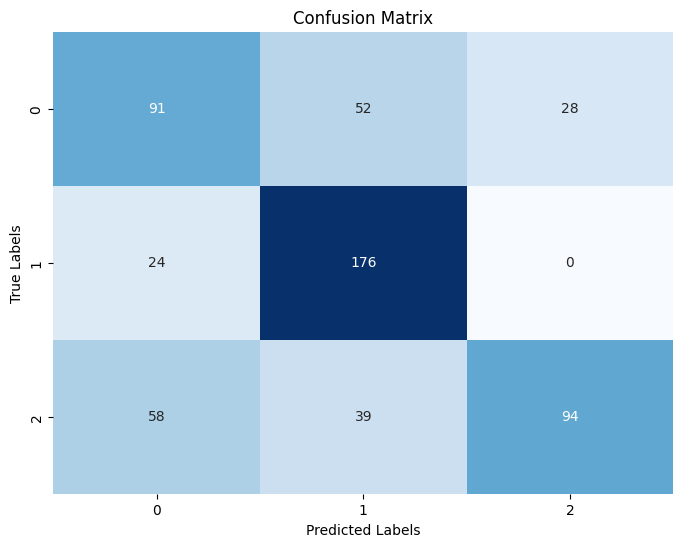

In [ ]:
# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Confusion Matrix:

1. Top Row: Shows how the model predicted instances (e.g., 91 instances predicted as Fully Vaccinated).
2. Left Column: Shows the actual distribution of instances (e.g., 171 instances were actually Fully Vaccinated).
3. Diagonal Elements: Indicate correct predictions for each class.
4. Off-Diagonal Elements: Indicate instances that were misclassified.

In [ ]:
# Plot model results using seaborn
plot_data = pd.DataFrame({'x1': df_long['Age groups'], 'x2': df_long['VACCINATION STATUS'],
                          'fitted': best_model.predict(df_long[['Age groups', 'CASES']]),
                          'class': df_long['VACCINATION STATUS'].astype('category')})


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=plot_data['x1'], y=plot_data['x2'], hue=plot_data['fitted'], palette='magma')
scatter_plot.set_xlabel("Age Groups")
scatter_plot.set_ylabel("Vaccination Status")
scatter_plot.set_title("Model Prediction")
plt.show()


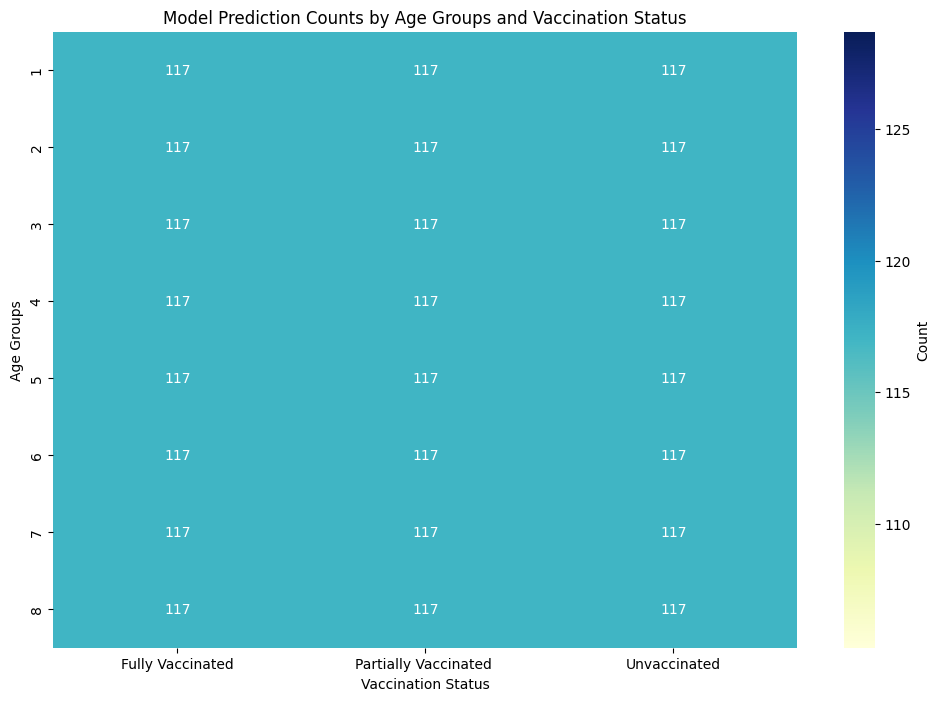

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table for better visualization
pivot_data = pd.pivot_table(plot_data, values='fitted', index='x1', columns='x2', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_data, annot=True, cmap='YlGnBu', fmt='g', cbar_kws={'label': 'Count'})
heatmap.set_xlabel("Vaccination Status")
heatmap.set_ylabel("Age Groups")
heatmap.set_title("Model Prediction Counts by Age Groups and Vaccination Status")
plt.show()


# Interpretation
The heatmap shows the same number for each cell suggests that the model is making consistent predictions across age groups and vaccination statuses. Each cell in the heatmap represents the count of instances where the model predicts a specific vaccination status for a particular age group.

*   Consistency: If the counts are similar across all cells, it indicates that the model is not favoring one age group or vaccination status over another. The predictions are distributed relatively evenly.
*   Balance: The model is providing a balanced prediction for different scenarios, and there is no significant bias towards any particular age group or vaccination status.

*   Model Confidence: If the model consistently predicts the same number across all cells, it may suggest that the model is not highly confident in its predictions. The lack of variation in predictions could be due to the model encountering similar patterns across different age groups.






#ROC AND AUC Curve

In [ ]:
# X  the features (in this case, 'Age groups' and case counts)
 X = df_long[['Age groups', 'CASES']]

IndentationError: ignored

In [ ]:
# y the target variable (vaccination status)
y = df_long['VACCINATION STATUS']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Assuming y_train is one-hot encoded
# Convert one-hot encoded labels to class labels
y_train_labels = np.argmax(y_train, axis=1)



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming X_train has missing values
# Create an imputer and fit it on X_train
imputer = SimpleImputer(strategy='mean')  # You can choose a different strategy if needed
X_train_imputed = imputer.fit_transform(X_train)

# Create and fit the logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train_imputed, y_train_labels)


LogisticRegression(multi_class='multinomial')

In [ ]:
# Get predicted probabilities on the test set
# Assuming X_test has missing values
# Use the same imputer that was fit on the training data
X_test_imputed = imputer.transform(X_test)

# Get predicted probabilities on the imputed test set
y_scores = model.predict_proba(X_test_imputed)
print(y_scores)

[[0.61184383 0.38815617]
 [0.66796116 0.33203884]
 [0.64173686 0.35826314]
 ...
 [0.65879255 0.34120745]
 [0.66680689 0.33319311]
 [0.63192323 0.36807677]]


In [ ]:
# If you want predicted labels (y_pred), you can use the argmax function
y_pred = np.argmax(y_scores, axis=1)



# Monte Carlo Simulation

In [ ]:
import numpy as np

# Number of Monte Carlo simulations
num_simulations = 1000

# Generate random samples for Age groups and CASES
random_age_groups = np.random.randint(1, 9, size=num_simulations)
random_cases = np.random.uniform(0, 300, size=num_simulations)

# Create a DataFrame with the random samples
monte_carlo_data = pd.DataFrame({'Age groups': random_age_groups, 'CASES': random_cases})

# Impute missing values in the Monte Carlo data using the same imputer
monte_carlo_data_imputed = imputer.transform(monte_carlo_data)

# Make predictions using the trained logistic regression model
monte_carlo_predictions = model.predict(monte_carlo_data_imputed)
monte_carlo_probabilities = model.predict_proba(monte_carlo_data_imputed)

# Display the results
monte_carlo_result_df = pd.DataFrame({
    'Age groups': monte_carlo_data['Age groups'],
    'CASES': monte_carlo_data['CASES'],
    'Predicted VACCINATION STATUS': monte_carlo_predictions,
    'Probability of Unvaccinated': monte_carlo_probabilities[:, 0],
    'Probability of Partially Vaccinated': monte_carlo_probabilities[:, 1],
    'Probability of Fully Vaccinated': monte_carlo_probabilities[:, 1]
})

print(monte_carlo_result_df.head())


NotFittedError: ignored

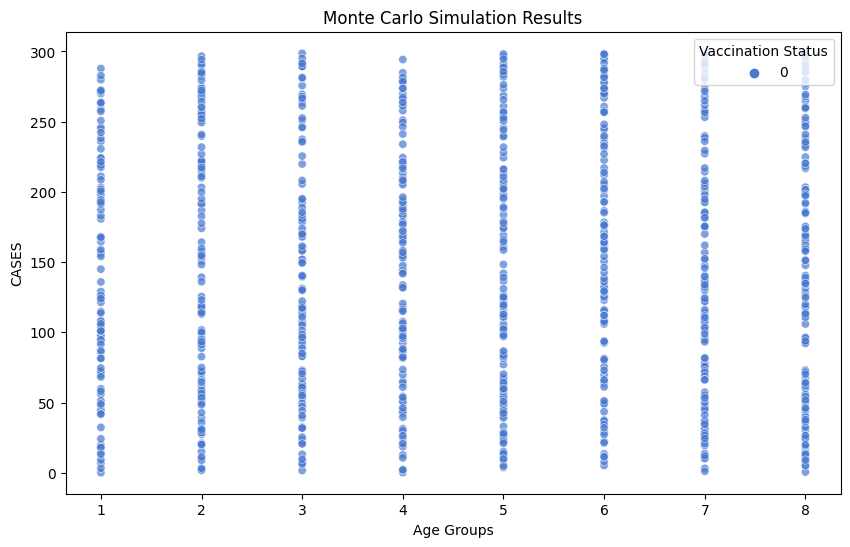

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(x=monte_carlo_result_df['Age groups'],
                               y=monte_carlo_result_df['CASES'],
                               hue=monte_carlo_result_df['Predicted VACCINATION STATUS'],
                               palette='muted', legend='full', alpha=0.7)

# Set labels and title
plt.xlabel("Age Groups")
plt.ylabel("CASES")
plt.title("Monte Carlo Simulation Results")

# Display the legend
plt.legend(title='Vaccination Status', loc='upper right')

# Show the plot
plt.show()
